# Day4 強化学習に対するニューラルネットワークの適用

## NNチュートリアル(多層パーセプトロン)

code4-1  
1層のNNとして 
$$\begin{bmatrix} 
    y_1 \\
    y_2 \\
    y_3 \\
    y_4 \\
\end{bmatrix}
= \begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22} \\
    a_{31} & a_{32} \\
    a_{41} & a_{42}
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix}
+ \begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 \\
    b_4
\end{bmatrix}$$
を考える
* $\mathbf{a}$: 重み, $\mathbf{b}$: バイアス


In [1]:
import numpy as np
from tensorflow.python import keras as K

# 1層のNN定義（入力次元が2)
# seaquentialは複数層をまとめられる、今は全結合層一つのみ
model = K.Sequential([K.layers.Dense(units=4, input_shape=((2, )))])

weight, bias = model.layers[0].get_weights()
print(f"Weight shape is {weight.shape}")
print(f"Bias shape is {bias.shape}")

# 最初の次元はデータ数に使われ、２つ目の次元が実際の行数になる？
x = np.random.rand(1, 2)
y = model.predict(x)
print(f"x is {x.shape} and y is {y.shape}")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Weight shape is (2, 4)
Bias shape is (4,)
x is (1, 2) and y is (1, 4)


code 4-3 複数データの場合の実装

In [2]:
# 2-layer neural network
model = K.Sequential([K.layers.Dense(units=4, input_shape=((2, )), activation="sigmoid"), K.layers.Dense(units=4)])

# Make Batch size 3 data (dimenstion of x is 2)
batch = np.random.rand(3, 2)
y = model.predict(batch)

print(y.shape)

(3, 4)


code4-4 ボストン市の住宅価格の予測  
【メモ】  
softplus = $\log(\exp{\mathbf{x}} + 1)$  
ReLUに似てる関数

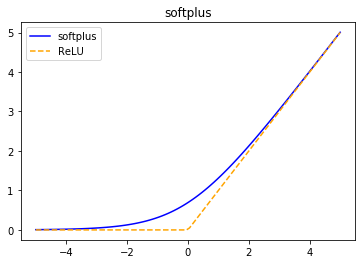

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

# softplus
x = np.linspace(-5, 5, 100)
y = np.log(np.exp(x) + 1)
relu = x * (x > 0)

plt.plot(x, y, color="blue", label="softplus")
plt.plot(x, relu, color="orange", linestyle="dashed", label="ReLU")
plt.title("softplus")
plt.legend()
plt.show()

Epoch 1/10
339/339 [==============================] - 0s 278us/sample - loss: 167.0204
Epoch 2/10
339/339 [==============================] - 0s 23us/sample - loss: 30.2728
Epoch 3/10
339/339 [==============================] - 0s 23us/sample - loss: 42.5959
Epoch 4/10
339/339 [==============================] - 0s 23us/sample - loss: 78.3165
Epoch 5/10
339/339 [==============================] - 0s 25us/sample - loss: 26.4228
Epoch 6/10
339/339 [==============================] - 0s 25us/sample - loss: 21.2681
Epoch 7/10
339/339 [==============================] - 0s 28us/sample - loss: 27.4726
Epoch 8/10
339/339 [==============================] - 0s 28us/sample - loss: 27.7475
Epoch 9/10
339/339 [==============================] - 0s 24us/sample - loss: 28.4192
Epoch 10/10
339/339 [==============================] - 0s 23us/sample - loss: 22.4517


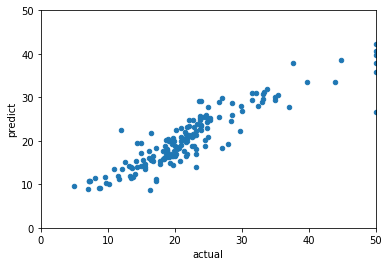

In [4]:

dataset = load_boston()

y = dataset.target
x = dataset.data

# About train : test = 7 : 3
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

model = K.Sequential([
    K.layers.BatchNormalization(input_shape=(13, )), # 13の特徴量の値全てを[0, 1]に
    K.layers.Dense(units=13, activation="softplus", kernel_regularizer="l1"), # softplus, l1正則化
    K.layers.Dense(units=1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
model.fit(X_train, y_train, epochs=10)

predicts = model.predict(X_test)
result = pd.DataFrame({
    "predict": np.reshape(predicts, (-1, )),
    "actual": y_test
})
limit = np.max(y_test)
result.plot.scatter(x="actual", y="predict", xlim=(0, limit), ylim=(0, limit))
plt.show()

## NNチュートリアル(CNN)

code 4-5

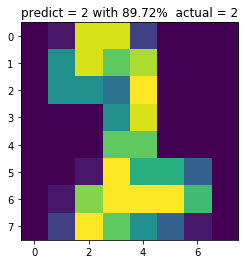

In [6]:
i = 2
predict_label = np.argmax(model.predict(X_test[i].reshape(-1, 8, 8, 1)))
predict_proba = np.max(model.predict(X_test[i].reshape(-1, 8, 8, 1)))
actual = np.argmax(y_test[i])

plt.title(f"predict = {predict_label} with {predict_proba * 100:.4}%  actual = {actual}")
plt.imshow(X_test[i, :, :, 0])
plt.show()